In [2]:
from google.colab import files
files.download('/content/cleaned_notebook.ipynb')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import nbformat
from google.colab import _message

# 1. Load current notebook as dict
nb_json = _message.blocking_request('get_ipynb')['ipynb']

# 2. Remove 'widgets' metadata if it exists
nb_json['metadata'].pop('widgets', None)

# 3. Convert dict to a NotebookNode object (required by nbformat.write)
nb_node = nbformat.from_dict(nb_json)

# 4. Save the cleaned notebook to file
clean_path = '/content/cleaned_notebook.ipynb'
with open(clean_path, 'w') as f:
    nbformat.write(nb_node, f)

print(f"✅ Cleaned notebook saved to: {clean_path}")



---- Basic Model Pipeline ---- (Add for column drop - needed)

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"miscmissla","key":"90c366b2f8f356fc6c878730108722ff"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle competitions download -c thapar-summer-school-2025-hack-iii

  0% 0.00/386k [00:00<?, ?B/s]
100% 386k/386k [00:00<00:00, 572MB/s]


In [ ]:
!unzip -q thapar-summer-school-2025-hack-iii.zip

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,output
0,68,12.5,0.25,0.25,0.25,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.421449,0.403129,31.394569,4952.01304
1,514,25.0,0.50,0.25,0.50,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.586603,0.490020,40.282376,7532.82953
2,547,12.5,0.25,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.483671,0.411591,34.781055,5715.00840
3,535,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.429001,0.398864,31.119881,4575.76991
4,223,12.5,0.25,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.546136,0.475965,39.096884,6801.32393


In [ ]:
print('\ndescribe: \n', df.describe())
print('\nnull values: \n', df.isnull().sum())
print('\n duplicated values: \n', df.duplicated().sum())


describe: 
               Row#    clonesize     honeybee      bumbles      andrena  \
count  8999.000000  8999.000000  8999.000000  8999.000000  8999.000000   
mean    430.482498    19.816646     0.385532     0.285178     0.489021   
std     213.076358     6.651219     0.305528     0.059091     0.148347   
min       0.000000    12.500000     0.000000     0.000000     0.000000   
25%     257.000000    12.500000     0.250000     0.250000     0.380000   
50%     468.000000    25.000000     0.500000     0.250000     0.500000   
75%     599.000000    25.000000     0.500000     0.380000     0.630000   
max     776.000000    40.000000    18.430000     0.380000     0.750000   

             osmia  MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
count  8999.000000       8999.000000       8999.000000           8999.000000   
mean      0.591268         82.161273         49.666841             68.645072   
std       0.144750          9.122452          5.529363              7.620838   


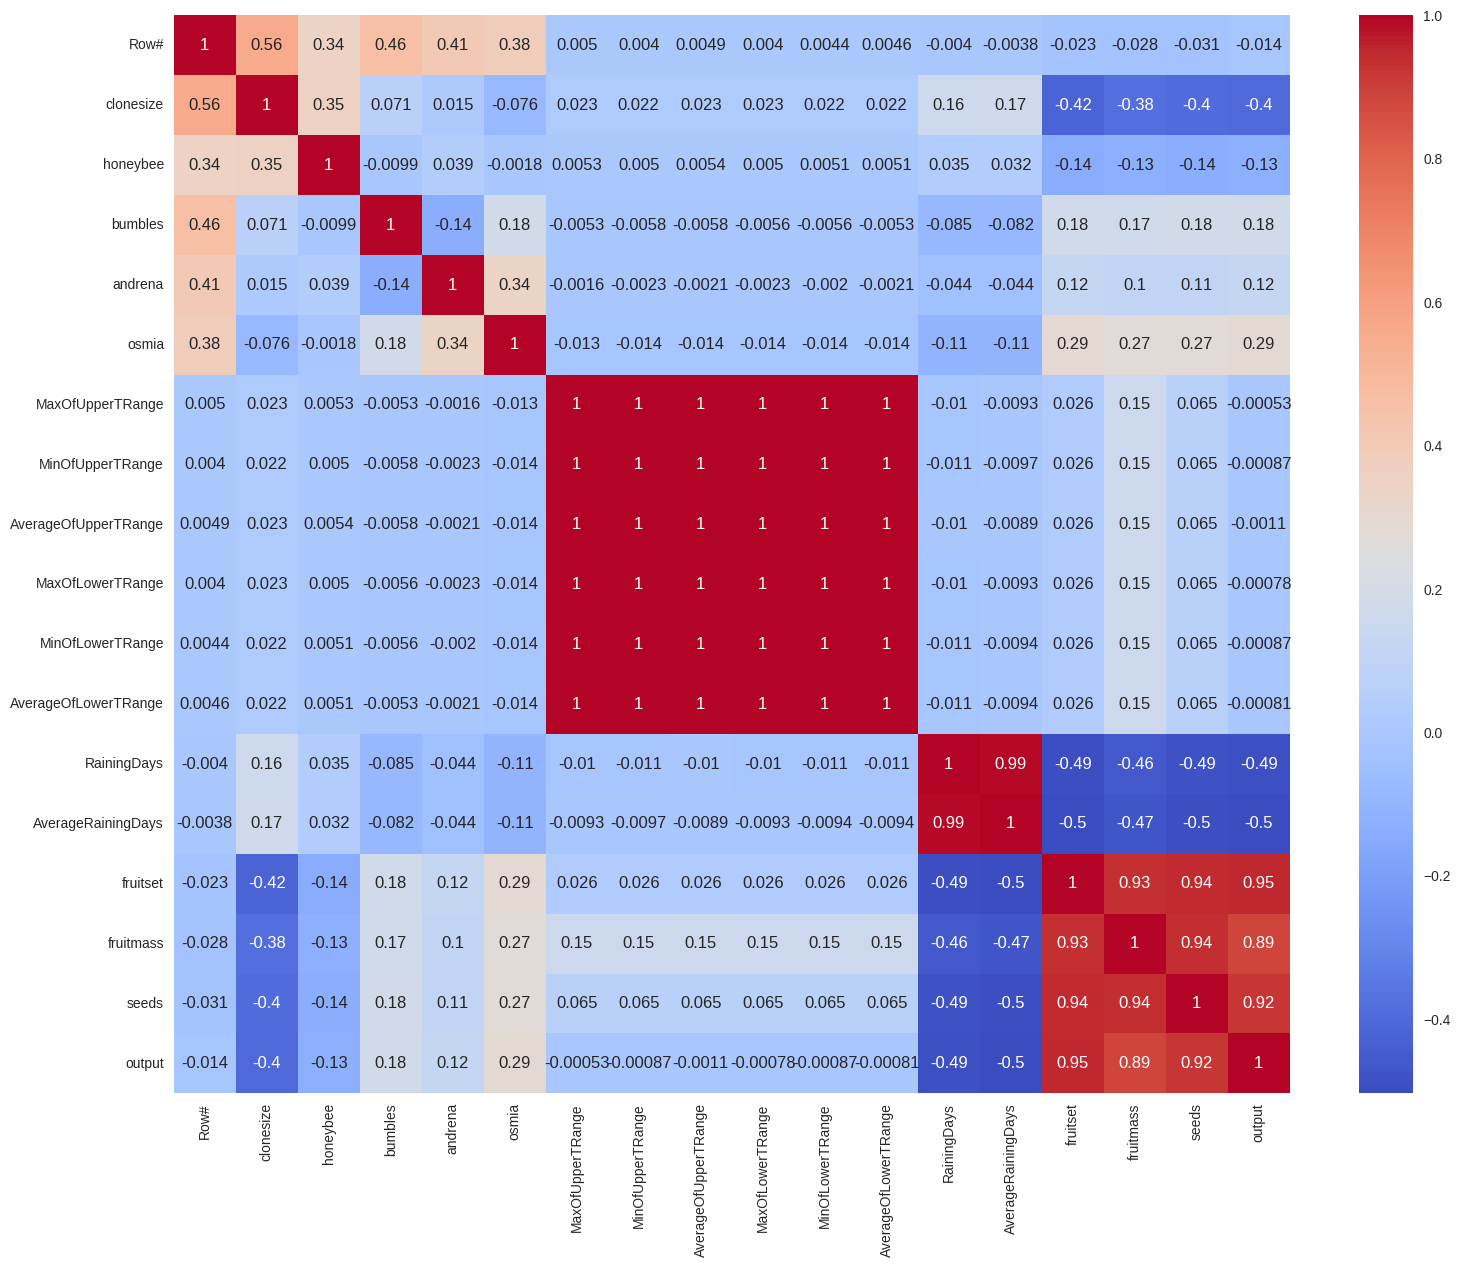

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
df.drop(columns = ['MaxOfUpperTRange', 'MinOfUpperTRange','MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange'], inplace=True)

In [ ]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'AverageOfUpperTRange', 'RainingDays', 'AverageRainingDays', 'fruitset',
       'fruitmass', 'seeds', 'output'],
      dtype='object')

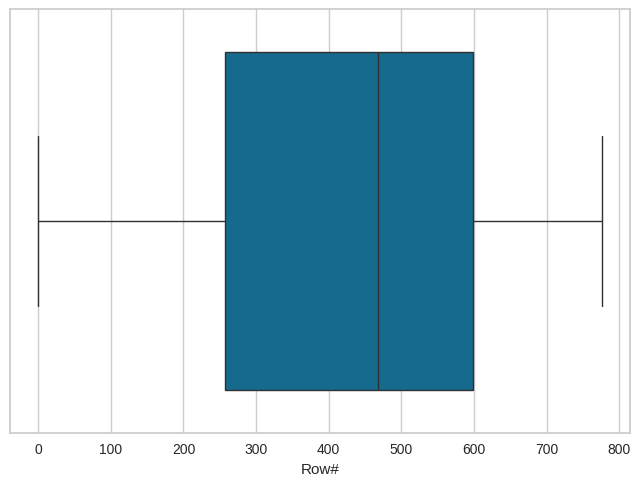

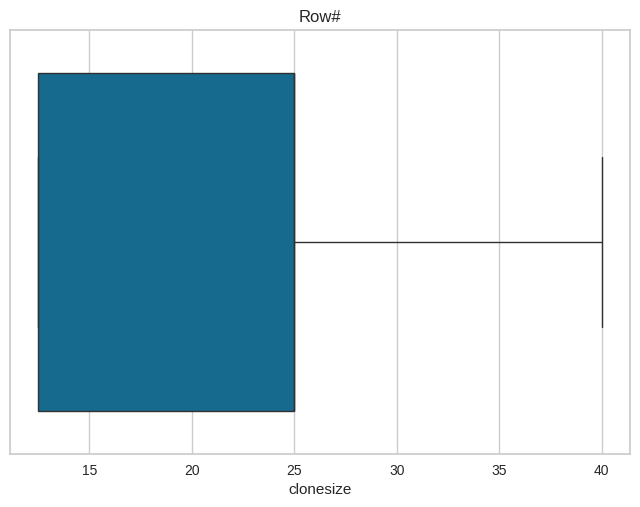

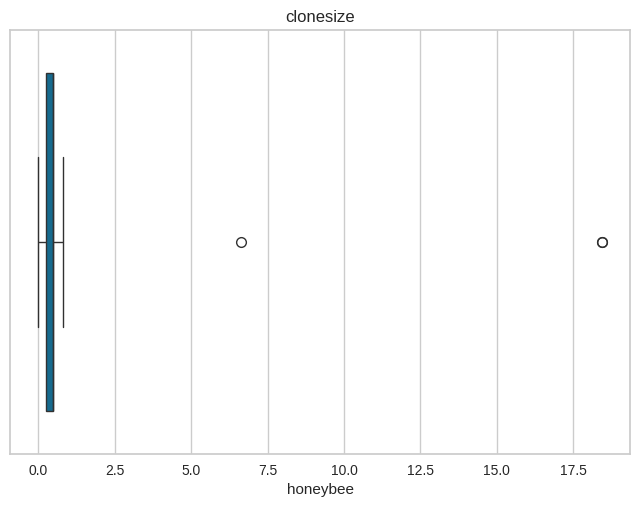

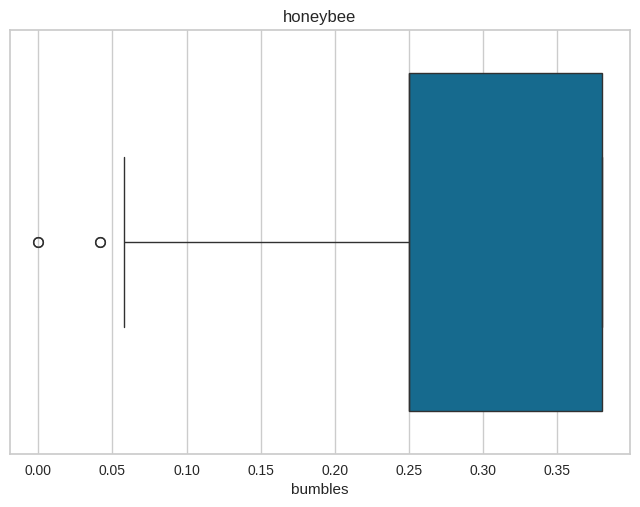

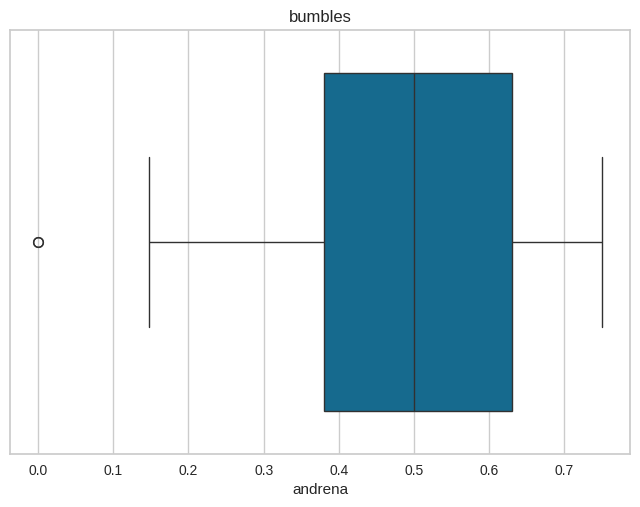

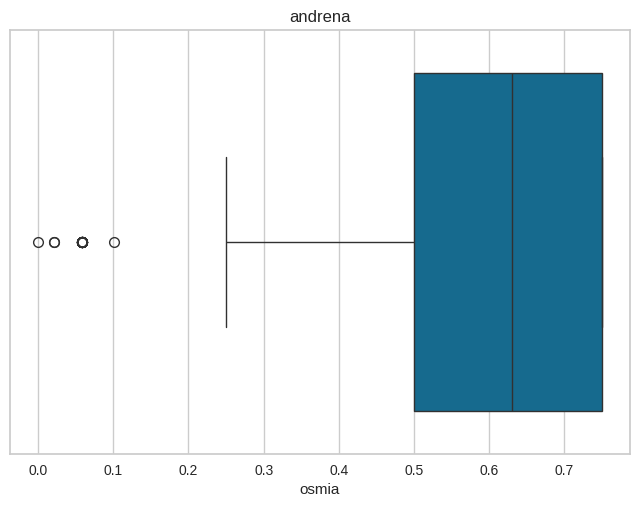

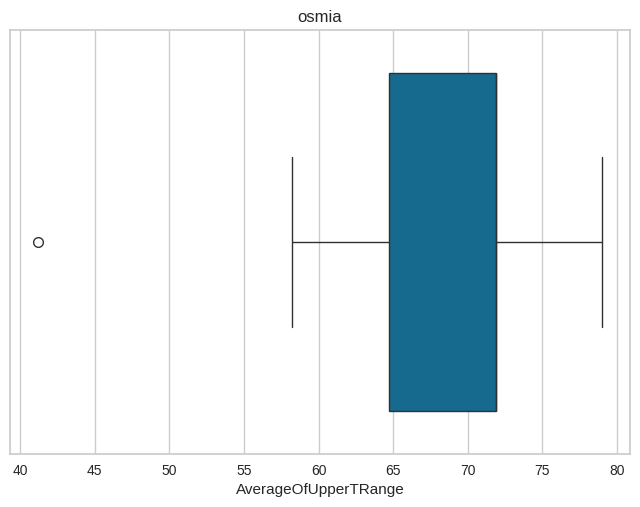

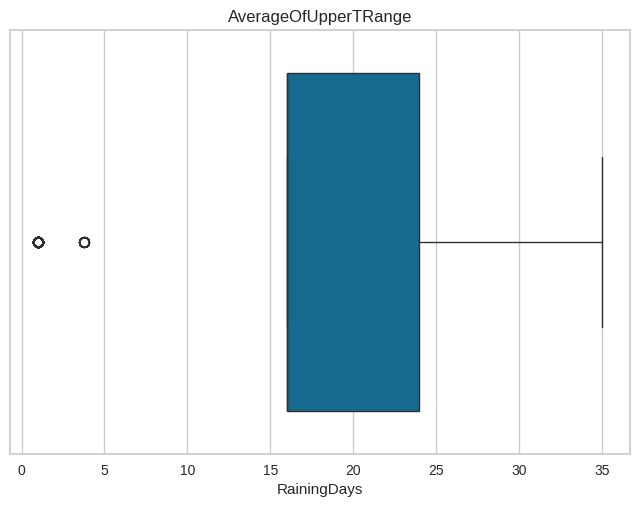

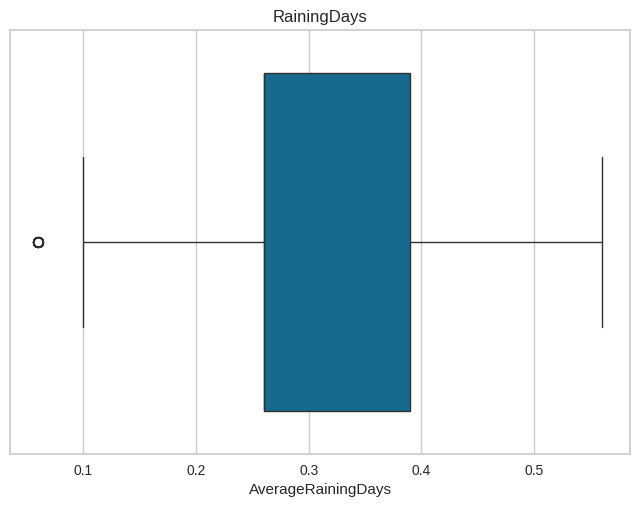

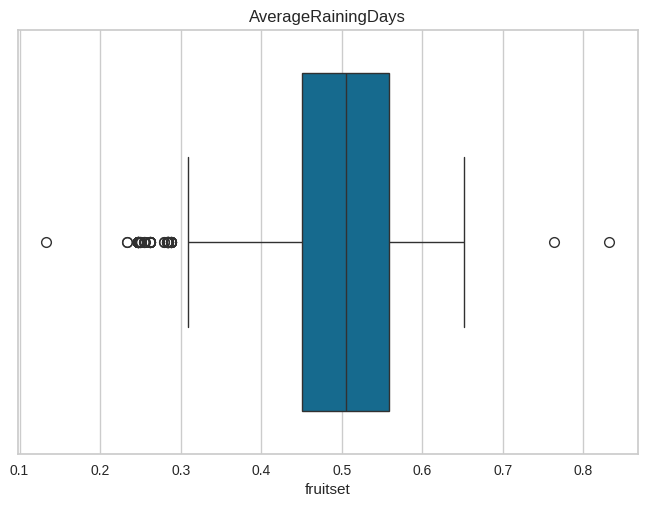

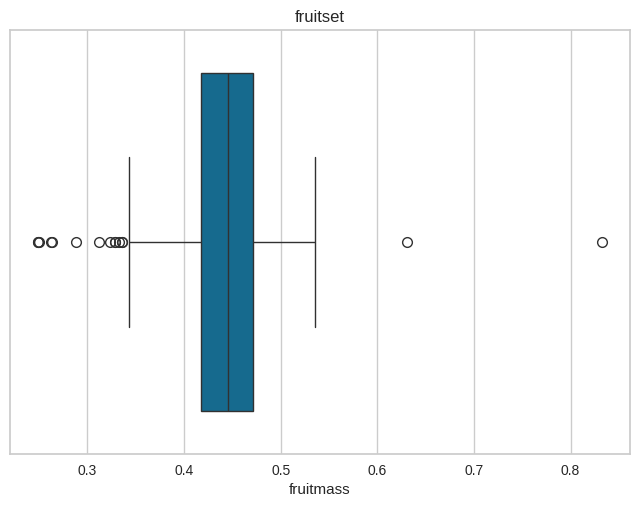

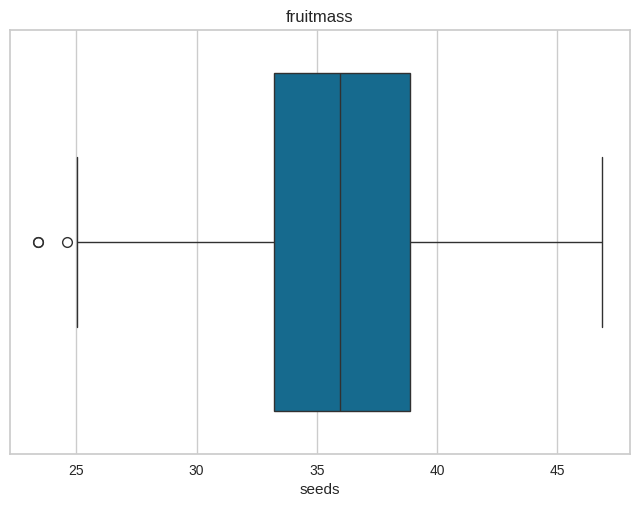

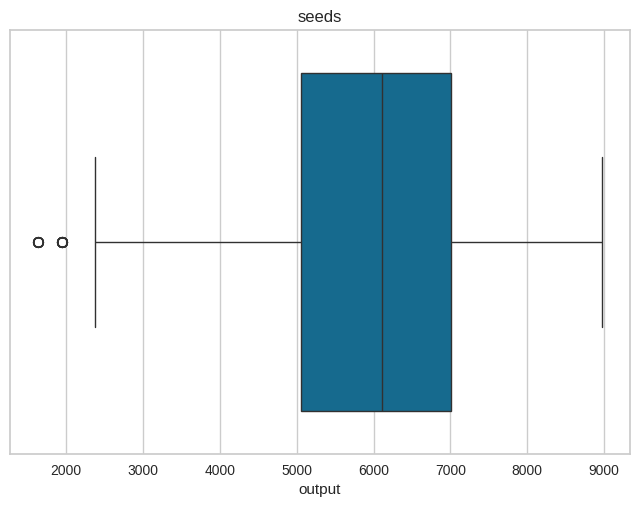

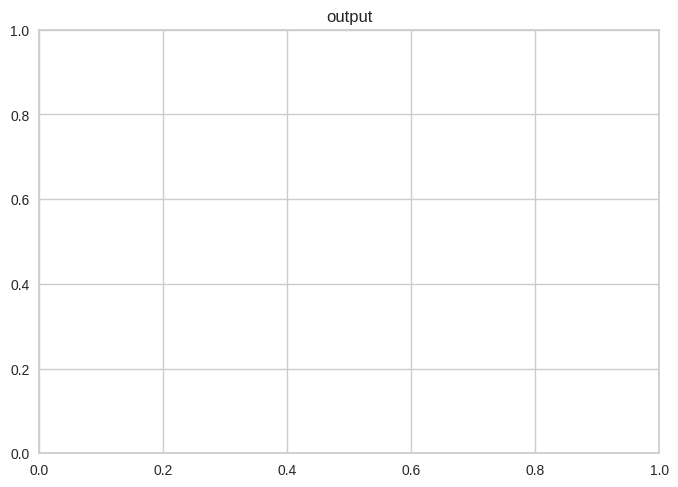

In [ ]:
for i in list(df.columns):
  sns.boxplot(x=df[i])
  plt.show()
  plt.title(i)


In [ ]:
# no column drop - basic
s = setup(data=df, target='yield', data_split_shuffle=True, session_id=123, verbose = True)
compare_models(sort = 'MAE')
# best model: gbr
# target parameter: MAE
# target parameter value: 246.5284
# goal: minimize

In [ ]:
# no column drop - Normalization only
s = setup(data=df, target='yield', data_split_shuffle=True, normalize=True, session_id=123, verbose = True)
compare_models(sort = 'MAE')
# best model: gbr
# target parameter: MAE
# target parameter value: 246.5346
# goal: minimize

In [ ]:
# no column drop - Transformation only
s = setup(data=df, target='yield', data_split_shuffle=True, transformation=True, transformation_method='yeo-johnson', session_id=123, verbose = True)
compare_models(sort = 'MAE')
# best model: gbr
# target parameter: MAE
# target parameter value: 246.5329
# goal: minimize

In [ ]:
# no column drop - Normalization + Transformation
s = setup(data=df, target='output', data_split_shuffle=True, normalize = True, normalize_method = 'zscore', transformation=True, transformation_method='yeo-johnson', session_id=123, verbose = True)
top3 = compare_models(n_select=3, sort='MAE')            # untuned defaults
# compare_models(sort = 'MAE')
# best model: gbr
# target parameter: MAE
# target parameter value: 246.5232
# goal: minimize

,Description,Value
0,Session id,123
1,Target,output
2,Target type,Regression
3,Original data shape,"(8999, 18)"
4,Transformed data shape,"(8999, 18)"
5,Transformed train set shape,"(6299, 18)"
6,Transformed test set shape,"(2700, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,247.7659,137886.7865,370.3488,0.9220,0.0705,0.0441,0.8380
lightgbm,Light Gradient Boosting Machine,251.6953,139038.2276,371.8847,0.9213,0.0709,0.0448,1.2540
rf,Random Forest Regressor,257.0627,146955.2325,382.3806,0.9168,0.0729,0.0457,3.9180
et,Extra Trees Regressor,265.7658,155168.2632,392.8449,0.9122,0.0752,0.0475,2.7350
xgboost,Extreme Gradient Boosting,272.4191,158237.3258,397.1001,0.9104,0.0762,0.0488,0.4380
huber,Huber Regressor,283.0762,174838.5231,417.7035,0.9009,0.0778,0.0503,0.2190
lasso,Lasso Regression,285.0204,174143.7019,416.8648,0.9013,0.0784,0.0512,0.2370
llar,Lasso Least Angle Regression,285.0298,174148.9018,416.8712,0.9013,0.0784,0.0512,0.1390
br,Bayesian Ridge,285.0315,173976.6625,416.6741,0.9014,0.0785,0.0512,0.1410
ridge,Ridge Regression,285.1982,174217.3600,416.9659,0.9013,0.0785,0.0512,0.1600


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [ ]:
tuned_top3 = [ tune_model(m, optimize='R2', fold = 5, n_iter=30) for m in top3 ]
compare_models(estimator_list=tuned_top3, sort='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,256.1225,135505.6109,368.1109,0.9266,0.0707,0.0459
1,254.9366,130590.4193,361.3730,0.9239,0.0621,0.0438
2,265.5299,160236.7317,400.2958,0.9139,0.0801,0.0484
3,267.3378,154216.5385,392.7041,0.9161,0.0745,0.0474
4,262.8896,154821.0204,393.4730,0.9107,0.0690,0.0449
Mean,261.3633,147074.0642,383.1914,0.9182,0.0713,0.0461
Std,4.9830,11745.8567,15.4417,0.0060,0.0059,0.0016


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,244.4027,130035.7188,360.6047,0.9295,0.0709,0.0444
1,242.9738,122845.1802,350.4928,0.9284,0.0590,0.0414
2,254.2844,154664.4749,393.2740,0.9169,0.0792,0.0467
3,257.7961,146779.8934,383.1186,0.9201,0.0736,0.0462
4,252.5397,148923.8561,385.9065,0.9141,0.0687,0.0435
Mean,250.3993,140649.8247,374.6793,0.9218,0.0703,0.0444
Std,5.7530,12100.5154,16.2857,0.0062,0.0066,0.0019


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:09:30
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
# no column drop - feature selection
s = setup(data=df, target='yield', data_split_shuffle=True, feature_selection=True, feature_selection_method='classic', feature_selection_estimator='lightgbm', session_id=123, verbose=True)
compare_models(sort='MAE')
# best model: gbr
# target parameter: MAE
# target parameter value: 246.7797
# goal: minimize

In [ ]:
# no column drop - outlier removal
s = setup(data=df, target='output', data_split_shuffle=True, remove_outliers=True, session_id=123, verbose=True)
compare_models(sort='MAE')
# best model: gbr
# target parameter: MAE
# target parameter value: 247.4997
# goal: minimize

,Description,Value
0,Session id,123
1,Target,output
2,Target type,Regression
3,Original data shape,"(8999, 18)"
4,Transformed data shape,"(8684, 18)"
5,Transformed train set shape,"(5984, 18)"
6,Transformed test set shape,"(2700, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,248.2951,137345.2329,369.6034,0.9223,0.0707,0.0443,1.0370
lightgbm,Light Gradient Boosting Machine,253.7370,141329.4384,374.9691,0.9200,0.0719,0.0454,1.5540
rf,Random Forest Regressor,259.0823,148448.0149,384.4097,0.9160,0.0735,0.0462,3.6160
et,Extra Trees Regressor,266.3497,155346.7852,393.1212,0.9121,0.0757,0.0478,2.5750
llar,Lasso Least Angle Regression,273.0047,162253.6210,402.2013,0.9081,0.0757,0.0489,0.3580
lasso,Lasso Regression,273.0192,162258.9913,402.2081,0.9081,0.0757,0.0489,0.3800
xgboost,Extreme Gradient Boosting,273.9914,159936.7797,399.2643,0.9094,0.0772,0.0494,0.4790
ridge,Ridge Regression,303.3621,960026.2955,707.6322,0.4643,0.0976,0.0548,0.2290
br,Bayesian Ridge,333.0856,5097213.0502,1348.5422,-1.8435,0.1011,0.0606,0.2410
lr,Linear Regression,334.9880,5382261.9193,1385.6083,-2.0022,0.1016,0.0610,0.2560


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=123)

In [ ]:
from pycaret.regression import *

s = setup(
    data=df,
    target='output',
    data_split_shuffle=True,
    normalize=True,               # ✅ Normalizes features (e.g., z-score or min-max)
    transformation=True,          # ✅ Applies power transform (e.g., Yeo-Johnson) to make data more Gaussian
    remove_outliers=True,         # ✅ Removes extreme outliers using IQR
    outliers_threshold=0.05,      # Optional: 5% of rows removed as outliers
    session_id=123,
    verbose=True
)
compare_models(sort='R2')

,Description,Value
0,Session id,123
1,Target,output
2,Target type,Regression
3,Original data shape,"(8999, 13)"
4,Transformed data shape,"(8684, 13)"
5,Transformed train set shape,"(5984, 13)"
6,Transformed test set shape,"(2700, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,249.4528,138804.3868,371.6728,0.9215,0.0714,0.0447,1.0280
lightgbm,Light Gradient Boosting Machine,256.3341,142621.4504,376.5875,0.9193,0.0734,0.0463,1.7450
rf,Random Forest Regressor,260.2276,148353.1788,384.2879,0.9160,0.0737,0.0465,3.3670
et,Extra Trees Regressor,266.0690,153527.9702,390.8293,0.9131,0.0757,0.0479,2.1720
xgboost,Extreme Gradient Boosting,275.4195,159427.9680,398.7631,0.9096,0.0776,0.0498,0.4480
omp,Orthogonal Matching Pursuit,288.5637,180742.9616,424.8516,0.8975,0.0781,0.0513,0.3690
lasso,Lasso Regression,285.6525,230791.9080,467.9584,0.8668,0.0822,0.0520,0.3510
llar,Lasso Least Angle Regression,285.6465,230767.3455,467.9201,0.8668,0.0822,0.0520,0.4550
knn,K Neighbors Regressor,359.7940,241753.1406,491.2504,0.8629,0.0973,0.0672,0.3440
par,Passive Aggressive Regressor,287.0638,269240.4911,502.3084,0.8445,0.0834,0.0518,0.3940


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=123)

In [ ]:
# no column drop - PCA
s = setup(data=df, target='yield', data_split_shuffle=True, pca=True, pca_method='incremental', session_id=123, verbose=True)
compare_models(sort='MAE')
# best model: lr
# target parameter: MAE
# target parameter value: 268.1751
# goal: minimize

In [ ]:
gbrmodel = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,252.7617,144521.4554,380.1598,0.9194,0.0819,0.0470
1,256.8214,158876.2634,398.5929,0.9117,0.0672,0.0441
2,269.9548,173822.3507,416.9201,0.8997,0.0779,0.0476
3,265.1881,160165.3500,400.2066,0.9098,0.0825,0.0493
4,264.3947,169559.9789,411.7766,0.9115,0.0969,0.0531
5,247.1387,116312.7005,341.0465,0.9348,0.0592,0.0429
6,261.4528,133016.3732,364.7141,0.9189,0.0690,0.0464
7,253.9636,138575.2981,372.2570,0.9224,0.0708,0.0453
8,252.8808,118204.8838,343.8094,0.9274,0.0608,0.0442


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
plot_model(gbrmodel, plot='feature')
plt.show()

In [ ]:
plot_model(gbrmodel, plot='learning')
plt.show()

In [ ]:
plot_model(gbrmodel, plot='error')
plt.show()

In [ ]:
plot_model(gbrmodel, plot='residuals')
plt.show()

In [ ]:
plot_model(gbrmodel, plot='parameter')
plt.show()

In [ ]:
tuned_model = tune_model(gbrmodel, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,246.2004,136816.7253,369.8874,0.9237,0.0809,0.0462
1,259.3220,160342.6306,400.4281,0.9109,0.0702,0.0455
2,272.6557,174627.2474,417.8843,0.8993,0.0813,0.0492
3,268.0310,163683.8478,404.5786,0.9079,0.0850,0.0505
4,273.3103,174393.6467,417.6047,0.9089,0.0995,0.0559
5,248.5769,115611.0047,340.0162,0.9352,0.0599,0.0434
6,260.0888,135264.3473,367.7830,0.9175,0.0709,0.0466
7,251.4043,140453.7038,374.7715,0.9213,0.0727,0.0454
8,254.5804,123405.6463,351.2914,0.9242,0.0632,0.0448


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
plot_model(tuned_model, plot='parameter')
plt.show()


In [ ]:
final_model = finalize_model(gbrmodel)

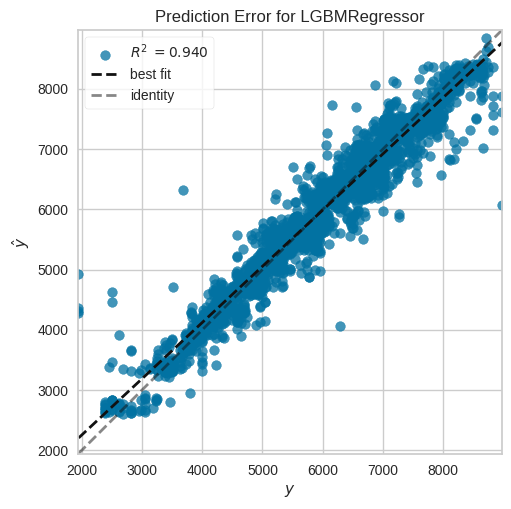

In [ ]:
plot_model(final_model, plot='error')
plt.show()

(Do the same preprocessing on test data that was done on train data - like column removal, outliers replacement,column name change etc.)

In [ ]:
test_df = pd.read_csv('/content/test.csv')
test_df.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,1,563,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.394441,0.399172,30.686398
1,2,74,12.5,0.25,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.340063,0.382602,29.647861
2,3,599,25.0,0.50,0.25,0.63,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.518776,0.449546,36.466203
3,4,556,25.0,0.50,0.25,0.63,0.50,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.392583,0.402729,31.577558
4,5,109,12.5,0.25,0.25,0.25,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.587320,0.483356,40.461331


In [ ]:
predictions = predict_model(final_model, data=test_df)
predictions.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,prediction_label
0,1,563,25.0,0.50,0.25,0.63,0.75,94.599998,57.200001,79.000000,68.199997,33.0,55.900002,34.0,0.56,0.394441,0.399172,30.686398,4157.297792
1,2,74,12.5,0.25,0.25,0.25,0.25,94.599998,57.200001,79.000000,68.199997,33.0,55.900002,34.0,0.56,0.340063,0.382602,29.647861,3317.342401
2,3,599,25.0,0.50,0.25,0.63,0.75,86.000000,52.000000,71.900002,62.000000,30.0,50.799999,1.0,0.10,0.518776,0.449546,36.466202,6383.045242
3,4,556,25.0,0.50,0.25,0.63,0.50,86.000000,52.000000,71.900002,62.000000,30.0,50.799999,24.0,0.39,0.392583,0.402729,31.577559,4190.802986
4,5,109,12.5,0.25,0.25,0.25,0.63,94.599998,57.200001,79.000000,68.199997,33.0,55.900002,34.0,0.56,0.587320,0.483356,40.461330,7326.878575


In [ ]:
predictions.rename(columns={'prediction_label': 'output'}, inplace=True)

In [ ]:
predictions.columns

Index(['id', 'Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'output'],
      dtype='object')

In [ ]:
submission = predictions[['id', 'output']]

In [ ]:
submission.to_csv('Lakshita_Aggarwal_102303893.csv', index=False)

In [ ]:
save_model(final_model, 'final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Row#', 'clonesize', 'honeybee',
                                              'bumbles', 'andrena', 'osmia',
                                              'MaxOfUpperTRange',
                                              'MinOfUpperTRange',
                                              'AverageOfUpperTRange',
                                              'MaxOfLowerTRange',
                                              'MinOfLowerTRange',
                                              'AverageOfLowerTRange',
                                              'RainingDays',
                                              'AverageRainingDays', 'fruitset',
                                              'fruitmass', 'seeds'],
                                     transform...
                  TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                

---- Extra Pipeline ----

In [ ]:
# gbrmodel = create_model('gbr')

In [ ]:
# bagged_model = ensemble_model(gbrmodel, method='Bagging', n_estimators=5)

In [ ]:
# boosted_model = ensemble_model(gbrmodel, method='Boosting')

In [ ]:
# print("📊 Bagged Model Performance:")
# bagged_preds = predict_model(bagged_model)
# print(bagged_preds.head())

In [ ]:
# print("📊 Boosted Model Performance:")
# boosted_preds = predict_model(boosted_model)
# print(boosted_preds.head())

In [ ]:
# plot_model(bagged_model, plot='error')
# plt.show()

In [ ]:
# plot_model(boosted_model, plot='error')
# plt.show()

In [ ]:
# tuned_ensemble1 = tune_model(boosted_model, optimize='MAE')

In [ ]:
# tuned_ensemble2 = tune_model(bagged_model, optimize='MAE')

In [ ]:
# final_model1 = finalize_model(tuned_ensemble1)

In [ ]:
# test_df = pd.read_csv('/content/test.csv')

In [ ]:
# predictions1 = predict_model(boosted_model, data=test_df)
# predictions1.head()

In [ ]:
# predictions1.rename(columns={'prediction_label': 'yield'}, inplace=True)
# submission = predictions1[['id', 'yield']]
# submission.to_csv('Lakshita_Aggarwal_102303893.csv', index=False)
# # save_model(final_model1, 'final_model')